In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

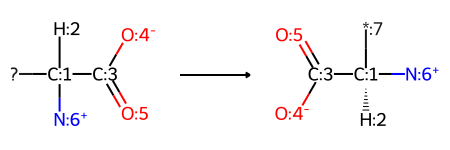

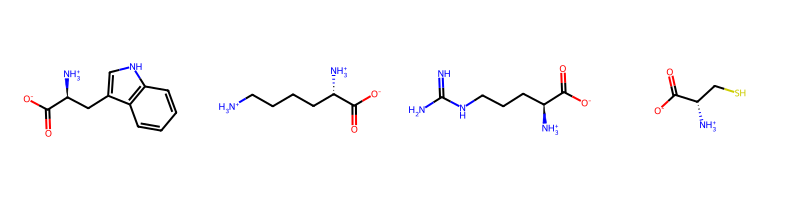

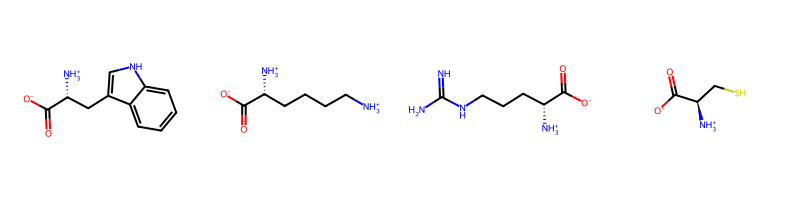

In [2]:
from rdkit.Chem import rdChemReactions

def run_d_rxn(mol, rxn):
    products = rxn.RunReactants([Chem.AddHs(mol, explicitOnly=True)])
    return Chem.MolFromSmiles(Chem.MolToSmiles(products[0][0])) #slow sanitization

laa_hs = ['[NH3+][C@@H](CC1=CNC2=C1C=CC=C2)C([O-])=O', 'C(CC[NH3+])C[C@@H](C(=O)[O-])[NH3+]', 'O=C([O-])[C@@H]([NH3+])CCCNC(N)=N', '[NH3+][C@@H](CS)C([O-])=O']
laas = [Chem.MolFromSmiles(laa) for laa in laa_hs]
#assume reactants are protonated, have single OC(=O)(N)C
rxn_h = rdChemReactions.ReactionFromSmarts('[H:2]-[C:1](-[C:3](-[O-:4])=[O:5])(-[N+:6])-[!#1:7]>>[H:2]-[C@@:1](-[C:3](-[O-:4])=[O:5])(-[N+:6])-[*:7]')
display(rxn_h)
products = [run_d_rxn(laa, rxn_h) for laa in laas]
display(MolsToGridImage(laas, molsPerRow=4))
display(MolsToGridImage(products, molsPerRow=4))


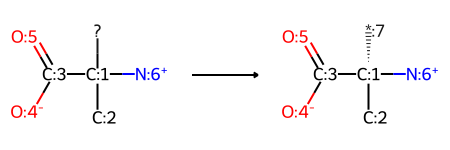

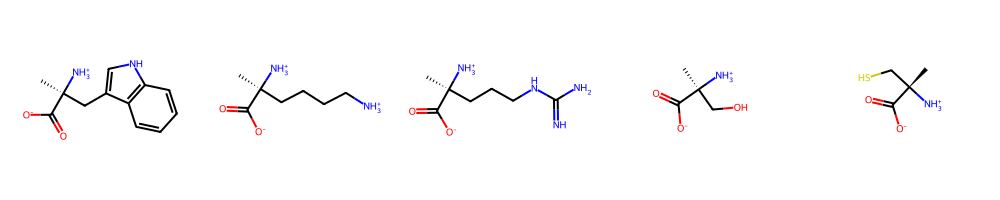

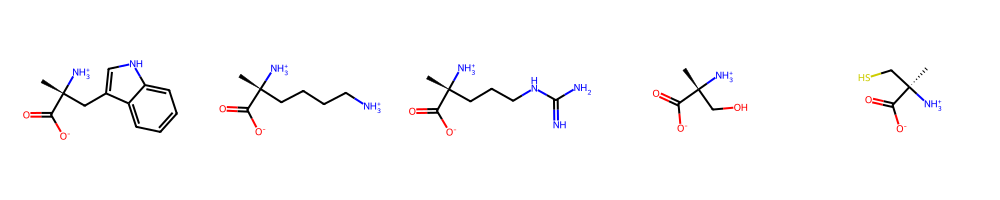

In [3]:
#alpha C-Me case
laa_acmes = ['[NH3+][C@@](C([O-])=O)(C)CC1=CNC2=C1C=CC=C2', '[NH3+]CCCC[C@@]([NH3+])(C)C([O-])=O', 'O=C([C@@](CCCNC(N)=N)(C)[NH3+])[O-]', '[NH3+][C@](C)(C([O-])=O)CO', '[NH3+][C@](CS)(C)C([O-])=O']
laas = [Chem.MolFromSmiles(laa) for laa in laa_acmes]
rxn_acme = rdChemReactions.ReactionFromSmarts('[CH3:2]-[C:1](-[C:3](-[O-:4])=[O:5])(-[N+:6])-[!#1:7]>>[CH3:2]-[C@@:1](-[C:3](-[O-:4])=[O:5])(-[N+:6])-[*:7]')
display(rxn_acme)
laa_exhs = [Chem.AddHs(laa, explicitOnly=True) for laa in laas]
products = [rxn_acme.RunReactants([laa]) for laa in laa_exhs]
products = [Chem.MolFromSmiles(Chem.MolToSmiles(p[0][0])) for p in products]
display(MolsToGridImage(laas, molsPerRow=5))
display(MolsToGridImage(products, molsPerRow=5))

In [ ]:
#TODO ring(alpha C-N) amino acid